# Laboratorio Automation

In questo elaborato vengono creati degli agenti disposti in formazione geometrica (che potrà essere generata casualmente oppure potrà essere definita manualmente) con l'obiettivo che questi raggiungano un punto di goal (anche esso casuale o definito manualmente) grazie all'azione del Campo di Potenziale Totale, il quale si compone dei seguenti elementi opportunamente pesati da delle costanti:

- Potenziale attrattivo verso il goal
- Potenziale repulsivo verso gli ostacoli
- Potenziale di formazione

$J_{tot}(x) = k_{att}J_{att}(x) + k_{rep}J_{rep}(x) + k_{form}J_{form}(x)$

L'ambiente considerato presenta degli ostacoli che potranno essere definiti manualmente o casualmente.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio
import io

In questo blocco di codice andiamo a definire la posizione del goal e quella degli ostacoli, che potranno essere modificate in modo che assumano posizioni casuali o manuali. Andiamo a definire inoltre il valore di:
- $\delta$: distanza di sicurezza (*delta_d* nel codice)
- $\delta_{0}$: distanza di influenza dell'ostacolo (*d_0* nel codice)
 

Nel problema è stata considerata una stanza dalle dimensioni 50x50.

In [99]:
# definizione posizione del goal

goal = np.array([40.0, 40.0]) 
#goal = np.random.uniform(0, 50, size=2)  # per generare un goal randomico entro i confini della stanza


# definizione ostacoli (muri)

# generazione manuale di ostacoli

# x_min, y_min, x_max, y_max

obstacles = np.array([
    
    # muri confine stanza

    [0.0, 0.0, 50.0, 1.0],  # muro inferiore
    [0.0, 49.0, 50.0, 50.0],  # muro superiore
    [0.0, 0.0, 1.0, 50.0],  # muro sinistro
    [49.0, 0.0, 50.0, 50.0],  # muro destro

    # muri interni

    [0.0, 30.0, 21.0, 31.0],  
    [25.0, 38.0, 26.0, 50.0], 
    [32.0, 25.0, 50.0, 26.0],  
    [35.0, 0.0, 36.0, 15.0]
])

# generazione ostacoli casuali

def generate_random_obstacles(num_obstacles, x_min=0, y_min=0, x_max=50, y_max=50, min_size=1, max_size=10):
    obstacles = []
    for _ in range(num_obstacles):

        x1 = np.random.uniform(x_min, x_max)
        y1 = np.random.uniform(y_min, y_max)


        width = np.random.uniform(min_size, max_size)
        height = np.random.uniform(min_size, max_size)

        # controllo su x_max e y_max in modo che non superino il confine
        x2 = min(x1 + width, x_max)
        y2 = min(y1 + height, y_max)

        obstacles.append([x1, y1, x2, y2])
    
    return np.array(obstacles)

#obstacles = generate_random_obstacles(10)
#print(obstacles)


delta_d = 1.5  # distanza di sicurezza invalicabile
d_0 = 3.0  # raggio d'influenza dell'ostacolo

Andiamo a definire adesso il numero di agenti e il raggio della formazione (distanza rispetto al centroide). 

In [100]:
num_agents = 5 
radius = 3.0

Andiamo ad inizializzare la formazione degli agenti usando le seguenti funzioni:
- **is_admissible()**: verifica che la formazione degli agenti sia ammissibile, ovvero che non vada ad occupare una posizione già occupata da un ostacolo
- **initialize_geometrical_formation()**: dispone gli agenti in modo geometrico, precisamente lungo una circonferenza, con un angolo di separazione uniforme tra ciascun agente. Per fare questo dobbiamo specificare il centro della formazione (manualmente o generato casualmente)

è stata definita inoltre una funzione per calcolare il centro della formazione:
- **calculate_centroid()**

In [101]:
# controllo posizioni ammissibili agenti
def is_admissible(position, obstacles):
    for obs in obstacles:
        x_min, y_min, x_max, y_max = obs
        
        if x_min <= position[0] <= x_max and y_min <= position[1] <= y_max:
            return False
        
    return True  

def initialize_geometrical_formation(num_agents, obstacles, radius, max_attempts=50):
    positions = []
    angle_step = 2 * np.pi / num_agents  # angolo di separazione tra i nodi (360° / numero di nodi)
    attempts = 0 # controllo nel caso formazione non ammissibile

    while len(positions) < num_agents and attempts < max_attempts:

        # centro della formazione
        center = np.array([8.0, 8.0])  # centro della formazione
        #center = np.random.uniform(0, 50, size=2) # centro della formazione randomico

        # posizione di ogni agente
        for i in range(num_agents):
            angle = i * angle_step
            position = center + radius * np.array([np.cos(angle), np.sin(angle)])

            # controllo posizione ammissibile
            if is_admissible(position, obstacles):
                    positions.append(position)

        # controllo per avere tutte posizioni ammissibili
        if len(positions) < num_agents:
            positions.clear()
            attempts += 1
            continue
    
    if len(positions) == num_agents:
        print("Formazione ammissibile")
    else:
        print("Formazione non ammissibile")
    
    return np.array(positions)

def calculate_centroid(positions):
    return np.mean(positions, axis=0)

Una volta definite le posizioni degli agenti andiamo a stamparle per verificare che queste siano ammissibili. Nel caso contrario possiamo ridefinirle manualmente o casualmente (in quest'ultimo caso sono stati considerati _50 tentativi_ di rigenerazione)

In [102]:
positions = initialize_geometrical_formation(num_agents, obstacles, radius, max_attempts=50)

if len(positions) > 0:
    print("\nPosizioni degli agenti:")
    for i, pos in enumerate(positions):
        print(f"Agente {i+1}:", pos)
    
    centroid = calculate_centroid(positions)

    print("\nCentroide della formazione:")
    print(f"x: {centroid[0]}, y: {centroid[1]}")
else:
    print("Gli agenti non hanno posizioni ammissibili")

Formazione ammissibile

Posizioni degli agenti:
Agente 1: [11.  8.]
Agente 2: [ 8.92705098 10.85316955]
Agente 3: [5.57294902 9.76335576]
Agente 4: [5.57294902 6.23664424]
Agente 5: [8.92705098 5.14683045]

Centroide della formazione:
x: 8.0, y: 8.0


Andiamo a disegnare l'ambiente completo di agenti, goal ed ostacoli per visualizzare graficamente il problema.  
Sono stati riportati due grafici in modo da visualizzare dove cominceranno ad agire $\delta$ e $\delta_{0}$

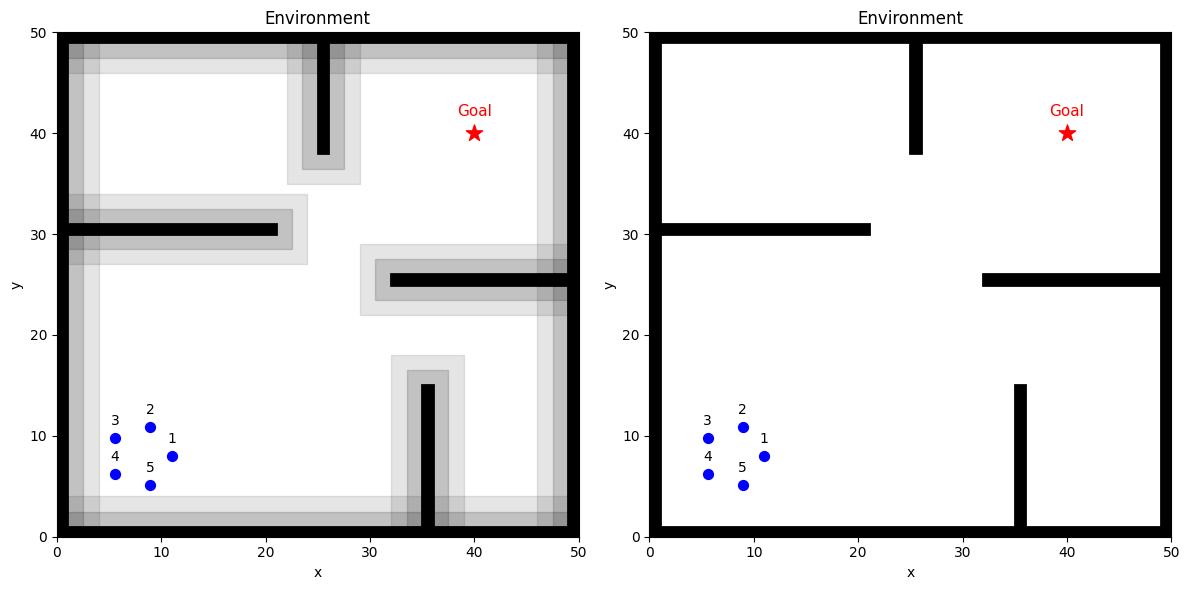

In [103]:
def draw_environment(goal, obstacles, delta_d, d_0, agents=None, include_deltas=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    ax.scatter(goal[0], goal[1], marker='*', color='red', s=150)
    ax.annotate('Goal', (goal[0], goal[1]), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', color='red', fontsize=11)

    for obs in obstacles:    
        x_min, y_min, x_max, y_max = obs
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='black')
        ax.add_patch(rect)

        if include_deltas:

            # distanza influenza (d_0)
            rect_d0 = plt.Rectangle(
                (x_min - d_0, y_min - d_0),  
                (x_max - x_min) + 2 * d_0,  
                (y_max - y_min) + 2 * d_0,  
                linewidth=1, edgecolor='black', facecolor='black', alpha=0.1)
            ax.add_patch(rect_d0)

            # distanza di sicurezza (delta_d)
            rect_delta_d = plt.Rectangle(
                (x_min - delta_d, y_min - delta_d),
                (x_max - x_min) + 2 * delta_d, 
                (y_max - y_min) + 2 * delta_d,
                linewidth=1, edgecolor='black', facecolor='black', alpha=0.15)
            ax.add_patch(rect_delta_d)

    if agents is not None:
        agents_x = [pos[0] for pos in agents]
        agents_y = [pos[1] for pos in agents]
        ax.scatter(agents_x, agents_y, marker='o', color='blue', s=50)

        for idx, (x, y) in enumerate(agents):
            ax.text(x, y + 1, str(idx+1), color='black', fontsize=10, ha='center', va='bottom')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, 50)  
    ax.set_ylim(0, 50)  
    ax.set_title('Environment')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

draw_environment(goal, obstacles, delta_d, d_0, agents=positions, include_deltas=True, ax=ax1)
draw_environment(goal, obstacles, delta_d, d_0, agents=positions, include_deltas=False, ax=ax2)

plt.tight_layout()
plt.show()     

Adesso andiamo a definire i potenziali che agiranno nel Campo di Potenziale Totale.

>Potenziale Attrattivo verso il goal

Il potenziale attrattivo implementato è quello quadratico, questo viene definito come:

#### $J_{att}(x) = \frac{1}{2} ||x - x_{G}||^2$

da cui il corrispettivo antigradiente:

### $- \frac{\partial J_{att}}{\partial x} = x_{G} - x$

oppurtanamente pesato da $k_{att}$




In [91]:
def attractive_potential(position, goal, k_att=1.0):
    if k_att == 0:
        return 0, np.zeros_like(position)
    
    diff = goal - position
    # potenziale attrattivo: (1/2 * costante * ||x_goal - x||^2)
    pot = 0.5 * k_att * np.linalg.norm(diff)**2
    # gradiente attrattivo: (costante * (x_goal - x))
    grad = k_att * diff
    
    return pot, grad

>Potenziale Repulsivo verso gli ostacoli  

Definita la distanza tra un agente e un ostacolo come:  
##### $d(q, O_k) = \min\limits_{q' \in O_k} ||q - q'||$

dove $q'$ rappresenta il punto dell'ostacolo a minima distanza dall'agente


Il potenziale repulsivo per un agente rispetto all'ostacolo $O_k$ è:

#### $ J_{rep,k}(q) = \begin{cases} 0  & \text{se} & d(q, O_k) \geq δ_0 \\ \frac{1}{2}(\frac{1}{d(q, O_k) - δ} - \frac{1}{δ_0 - δ})^2 & \text{se} & d(q, O_k) < δ_0 \\ \end{cases} $

dove $δ_0$ è la distanza di influenza dell'ostacolo e $δ$ è quella di sicurezza.

L'antigradiente corrispettivo è definito come:

#### $- \frac{\partial J_{rep,k}(q)}{\partial q} = \begin{cases} 0  & \text{se} & d(q, O_k) \geq δ_0 \\ (\frac{1}{d(q, O_k) - δ} - \frac{1}{δ_0 - δ}) \frac{1}{(d(q, O_k) - δ)^2} & \text{se} & d(q, O_k) < δ_0 \\ \end{cases} $

oppurtanamente pesato da $k_{rep}$



In [92]:
def repulsive_potential(positions, obstacles, delta_d, d_0, k_obstacle, max_force = 100):
    gradients = np.zeros_like(positions, dtype=np.float64)  # inizializza i gradienti a zero
    
    for obs in obstacles:
        x_min, y_min, x_max, y_max = obs

        for i, agent_pos in enumerate(positions):
            # trovamio il punto più vicino dell'ostacolo rispetto all'agente e calcoliamone la distanza
            closest_x = np.clip(agent_pos[0], x_min, x_max)
            closest_y = np.clip(agent_pos[1], y_min, y_max)
            closest_point = np.array([closest_x, closest_y])

            distance_to_obstacle = np.linalg.norm(agent_pos - closest_point) # q - q'

            # direzione della forza repulsiva
            direction = agent_pos - closest_point
            if np.linalg.norm(direction) > 0:
                direction = direction.astype(np.float64)
                direction /= np.linalg.norm(direction)  # normalizza la direzione

            # se la distanza è inferiore a delta_d, applichiamo una forza molto grande invalicabile
            if distance_to_obstacle < delta_d:
                force = 1000 * direction
                
            # calcolo gradiente repulsivo    
            elif delta_d <= distance_to_obstacle < d_0:
                term1 = 1 / (distance_to_obstacle - delta_d)
                term2 = 1 / (d_0 - delta_d)
                grad = k_obstacle * (term1 - term2) * term1**2
                force = grad * direction
            else:    
                force = np.array([0.0, 0.0])

            # saturazione per evitare che gli agenti vengano spinti fuori dai confini dell'ambiente
            force_magnitude = np.linalg.norm(force) # scalare
            if force_magnitude > max_force:
                force = force * (max_force / force_magnitude)

            gradients[i] += force

    return gradients

>Potenziale di Formazione

Definiamo la distanza desiderata (*desired_radius* nel codice)
tra coppie di agenti $i, j$ come:

##### $||x_i - x_j|| = \delta_{i, j}$   $\forall i, j$

Il potenziale attrattivo tra coppie di agenti è:

$J_{for}(x) = \sum_{\{i, j\in \varepsilon \}} J_{ij} (x_i, x_j)$

L'antigradiente per l'agente $i$ si definisce come:

#### $- \frac{\partial J_{for}}{\partial x_i} \Big|_{x = x(t)} = \sum_{\{j\in N_i \}} (||x_i - x_j||^2 - \delta_{i, j}^2)(x_j - x_i) $

opportunamente pesato da $k_{form}$

In questo codice il potenziale di formazione è stato diviso in due parti:
- una parte prende in considerazione il **potenziale tra agenti** 
- un parte prende in considerazione il **potenziale tra il singolo agente e il centroide della formazione**

rispettivamente e oppurtunamente pesati da $k_{agents}$ e $k_{center}$

Il gradiente di formazione totale è la somma di questi due contributi



In [93]:
def formation_potential(positions, desired_radius, k_agents, k_center):
    num_agents = len(positions)
    gradients = np.zeros_like(positions, dtype=np.float64)

    centroid = calculate_centroid(positions)

    for i in range(num_agents):
        agent_pos = positions[i]

        # forza attrattiva verso il centroide
        diff_cen = centroid - agent_pos
        dist_cen = np.linalg.norm(diff_cen)

        if dist_cen > 0:
            force_att = k_center * (dist_cen**2 - desired_radius**2) * (diff_cen)
            gradients[i] += force_att

        # forza repulsiva tra agenti
        for j in range(num_agents):
            if i != j:
                agent_pos_ni = positions[j]
                diff_agents = agent_pos - agent_pos_ni # agente i e altro agente (vicino di i)
                dist_agents = np.linalg.norm(diff_agents)

                if dist_agents > 0 and dist_agents < desired_radius:
                    force_rep = - k_agents * (dist_agents**2 - desired_radius**2) * (diff_agents)

                    gradients[i] += force_rep 

    return gradients

Una volta definite l'environment e i gradienti utilizzati andiamo a settare i parametri della simulazione. In particolare definiamo il learning rate per quantificare quanto sarà grande il passo di aggiornamento. 

NB: la distanza desiderata è impostata uguale al _radius_ ovvero il raggio della formazione definito a inizio codice, tuttavia è possibile andare anche a modificare il raggio nel caso si vogliano fare delle simulazioni in cui all'inizio gli agenti si trovano ad una certa distanza per poi regolarsi in modo da raggiungere quella desiderata.

In [109]:
k_obstacle = 0.5
k_att = 0.3
learning_rate = 0.01 #0.0000001
num_steps = 1500
delta_d = 1.5  # distanza di sicurezza invalicabile
d_0 = 3.0 # raggio di influenza dell'ostacolo
desired_radius = radius
#desired_radius = 2.0  # raggio desiderato della formazione
k_agents = 1.0  # costante di repulsione tra agenti
k_center = 1.0  # costante di attrazione verso il centroide

In [ ]:
#positions = initialize_geometrical_formation(num_agents, obstacles, radius, max_attempts=50) # da commentare se si usano le posizioni randomiche, se si usano quelle manuali si può lasciare commentanto o senza commento per ri-inizializzare la formazione

for i, pos in enumerate(positions):
    _, grad_att = attractive_potential(positions, goal, k_att)
    grad_rep = repulsive_potential(positions, obstacles, delta_d, d_0, k_obstacle)
    grad_form = formation_potential(positions, desired_radius, k_agents, k_center)
    print(f"Agente {i+1}, \nPosizione {pos} \nGradiente Attrattivo {grad_att[i]} \nGradiente Repulsivo: {grad_rep[i]} \nGradiente di Formazione: {grad_form[i]}\n")

Formazione ammissibile
Agente 1, 
Posizione [11.  8.] 
Gradiente Attrattivo [8.7 9.6] 
Gradiente Repulsivo: [0. 0.] 
Gradiente di Formazione: [0. 0.]

Agente 2, 
Posizione [ 8.92705098 10.85316955] 
Gradiente Attrattivo [9.32188471 8.74404914] 
Gradiente Repulsivo: [0. 0.] 
Gradiente di Formazione: [-3.29354671e-15 -1.01364945e-14]

Agente 3, 
Posizione [5.57294902 9.76335576] 
Gradiente Attrattivo [10.32811529  9.07099327] 
Gradiente Repulsivo: [0. 0.] 
Gradiente di Formazione: [-4.31130861e-15  3.13234906e-15]

Agente 4, 
Posizione [5.57294902 6.23664424] 
Gradiente Attrattivo [10.32811529 10.12900673] 
Gradiente Repulsivo: [0. 0.] 
Gradiente di Formazione: [0. 0.]

Agente 5, 
Posizione [8.92705098 5.14683045] 
Gradiente Attrattivo [ 9.32188471 10.45595086] 
Gradiente Repulsivo: [0. 0.] 
Gradiente di Formazione: [0. 0.]



Le posizioni degli agenti nel tempo vengono aggiornate secondo la formula di discesa del gradiente:

##### $x_{i}(t+1) = x_{i}(t) - \epsilon \frac{\partial J(x)}{\partial x_i}\Bigr|_{\substack{x=x(t)}}$

considerando il gradiente totale dei potenziali che agiscono sul singolo agente _i_

In [111]:
def update_positions(agents_positions, obstacles, goal, delta_d, d_0, 
                     k_obstacle, k_att, k_agents, k_center, desired_radius, learning_rate):
    
    # gradiente potenziale repulsivo dagli ostacoli
    grad_rep = repulsive_potential(agents_positions, obstacles, delta_d, d_0, k_obstacle)
    
    # gradiente potenziale attrattivo verso il goal
    grad_att = np.array([attractive_potential(pos, goal, k_att)[1] for pos in agents_positions]) if k_att > 0 else np.zeros_like(agents_positions)
    
    # gradiente potenziale di formazione
    grad_formation = formation_potential(agents_positions, desired_radius, k_agents, k_center)

    total_gradient = grad_rep + grad_att + grad_formation 
    new_positions = agents_positions + learning_rate * total_gradient

    return new_positions

Infine salviamo una .gif relativa alla simulazione scelta, in particolare possiamo decidere il parametro _duration_ nel seguente modo per modellare a piacimento la velocità della .gif:

- più è **basso** il valore, più la .gif sarà **veloce**
- più è **alto** il valore, più la .gif sarà **lenta**

In [112]:
def save_gif():
    images = []
    for step in range(num_steps):
        fig, ax = plt.subplots()
        
        global positions
        positions = update_positions(positions, obstacles, goal, delta_d, d_0, k_obstacle, k_att, k_agents, k_center, desired_radius, learning_rate)
        
        for obs in obstacles:
            x_min, y_min, x_max, y_max = obs
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='black')
            ax.add_patch(rect)
        
        ax.scatter(goal[0], goal[1], marker='*', color='red', s=150)
        ax.annotate('Goal', (goal[0], goal[1]), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', color='red', fontsize=11)
        
        ax.scatter(positions[:, 0], positions[:, 1], color='blue', s=50)
        
        ax.set_xlim(0, 50)
        ax.set_ylim(0, 50)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Total Artificial Potential Field')

        # salva il frame in un buffer + generazione gif
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        images.append(imageio.imread(buf))
        plt.close()

    # crea la .gif
    imageio.mimsave('agents_no_random.gif', images, duration=1.0)  # durata tra i frame in secondi (fps)

save_gif()

C:\Users\noble\AppData\Local\Temp\ipykernel_24060\262282825.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))
